# Support Vector Machine on Iris Dataset

In this notebook, we will apply a Support Vector Machine (SVM) classifier on the **Iris dataset**. The dataset consists of 4 features (sepal length, sepal width, petal length, and petal width) and 3 classes (species of flowers). We will perform classification, evaluate the model, and visualize the decision boundaries using SVM.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load the Iris Dataset

We will first load the Iris dataset and examine the features and target variables.

In [2]:
# Load the iris dataset. We have used a datset that is preinstalled in Python. 
# If you need to use a separate dataset, use pd.read_csv('filename.csv')
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (species)

### Step 2: Split the Data into Training and Testing Sets

Next, we'll split the dataset into training and testing sets (80% train, 20% test).

In [3]:
# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Initialize and Train the SVM Model

We will initialize the SVM model with a **Radial Basis Function (RBF)** kernel and train it on the training data.

In [4]:
# Initialize the SVM model with a radial basis function (RBF) kernel
model = SVC(kernel='rbf')

# Train the model
model.fit(X_train, y_train)

SVC()

### Step 4: Make Predictions and Evaluate the Model

After training the model, we will make predictions on the test set and evaluate the model's performance using accuracy and a classification report.

In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Step 5: Visualizing the Decision Boundary

Now, let's visualize the decision boundary for the first two features of the dataset (Sepal Length and Sepal Width). This will help us understand how the model is separating the classes.

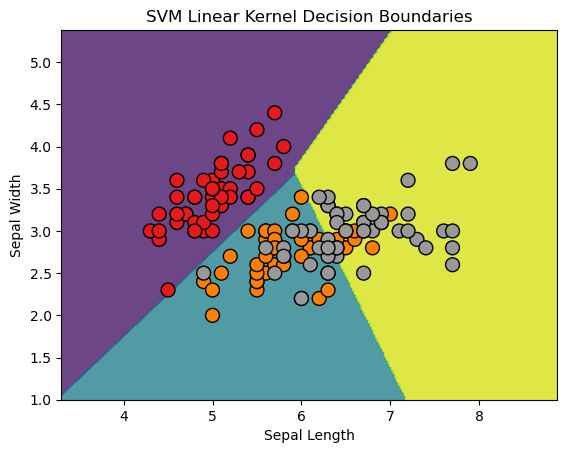

In [6]:
# Extract the first two features for visualization
X_vis = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Train an SVM classifier with a linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Plot the decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=plt.cm.Set1)
plt.title('SVM Linear Kernel Decision Boundaries')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

### Conclusion
In this notebook, we have successfully trained a Support Vector Machine (SVM) classifier using the Iris dataset. We have visualized the decision boundaries and evaluated the model's performance with accuracy and a classification report.